# Exploration

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
df = pd.read_csv("datasets/dataset.csv")

#Adding Attack Type column
#df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,236,1228,0,0,0,0,...,1.00,0.00,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,233,2032,0,0,0,0,...,1.00,0.00,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,239,486,0,0,0,0,...,1.00,0.00,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,238,1282,0,0,0,0,...,1.00,0.00,0.20,0.0,0.0,0.0,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos
1224603,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos
1224604,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos
1224605,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos


In [4]:
df.shape

(1224607, 43)

In [5]:
df['target'].value_counts()

target
normal.             607224
neptune.            369420
smurf.              227524
ipsweep.              7579
satan.                5393
portsweep.            2782
nmap.                 2316
back.                 2002
teardrop.              199
guess_passwd.           53
pod.                    40
warezmaster.            20
land.                   17
imap.                   12
ftp_write.               8
multihop.                6
buffer_overflow.         5
phf.                     3
perl.                    2
loadmodule.              2
Name: count, dtype: int64

In [6]:
df['Attack Type'].value_counts()

Attack Type
normal    607224
dos       599202
probe      18070
r2l          102
u2r            9
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224607 entries, 0 to 1224606
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1224607 non-null  int64  
 1   protocol_type                1224607 non-null  object 
 2   service                      1224607 non-null  object 
 3   flag                         1224607 non-null  object 
 4   src_bytes                    1224607 non-null  int64  
 5   dst_bytes                    1224607 non-null  int64  
 6   land                         1224607 non-null  int64  
 7   wrong_fragment               1224607 non-null  int64  
 8   urgent                       1224607 non-null  int64  
 9   hot                          1224607 non-null  int64  
 10  num_failed_logins            1224607 non-null  int64  
 11  logged_in                    1224607 non-null  int64  
 12  num_compromised              1224607 non-n

In [8]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,...,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06,1.224607e+06
mean,3.657871e+00,1.418154e+03,2.060602e+03,1.388200e-05,5.169005e-04,1.633177e-05,2.698335e-02,1.004404e-04,4.408108e-01,1.232804e-02,...,1.932816e+02,1.631483e+02,6.651357e-01,3.371853e-02,2.354410e-01,1.521086e-02,3.035455e-01,3.032830e-01,2.157195e-02,2.103485e-02
std,2.116816e+02,6.275398e+05,2.982278e+04,3.725832e-03,3.849470e-02,6.516316e-03,6.537457e-01,1.268298e-02,4.964845e-01,2.257820e+00,...,9.521015e+01,1.138374e+02,4.436738e-01,9.374913e-02,4.021011e-01,5.426987e-02,4.589240e-01,4.593157e-01,1.399744e-01,1.401894e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.110000e+02,1.600000e+01,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,3.660000e+02,1.046000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,6.000000e-02,2.000000e-01,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,6.933756e+08,1.173059e+07,1.000000e+00,3.000000e+00,5.000000e+00,7.700000e+01,5.000000e+00,1.000000e+00,8.840000e+02,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df.describe(include='object')

,protocol_type,service,flag,target,Attack Type
count,1224607,1224607,1224607,1224607,1224607
unique,3,66,11,20,5
top,tcp,http,SF,normal.,normal
freq,945029,486084,827040,607224,607224


# Pre-processing

In [11]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
# Number of duplicate rows
df.duplicated().sum()

586689

In [13]:
#df.drop_duplicates(inplace=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,236,1228,0,0,0,0,...,1.00,0.00,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,233,2032,0,0,0,0,...,1.00,0.00,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,239,486,0,0,0,0,...,1.00,0.00,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,238,1282,0,0,0,0,...,1.00,0.00,0.20,0.0,0.0,0.0,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos
1224603,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos
1224604,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos
1224605,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos


In [14]:
df.shape

(1224607, 43)

In [15]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

# Visualisation

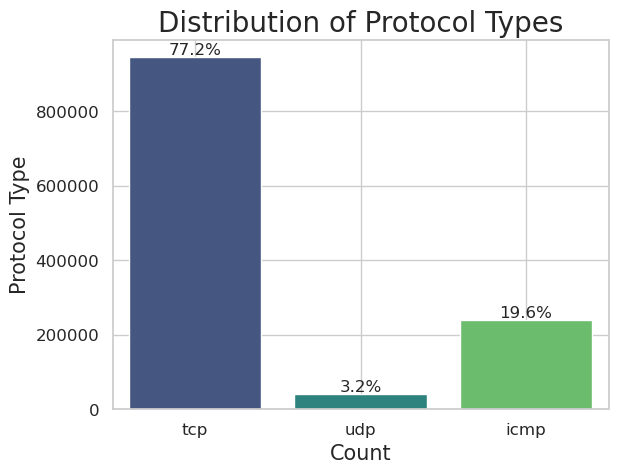

In [17]:
%matplotlib inline
sns.set(style="whitegrid")

# Create the countplot with a color palette
ax = sns.countplot(data=df, x="protocol_type", palette="viridis")

# Set plot labels and title with increased font size
plt.xlabel("Count", fontsize=15)
plt.ylabel("Protocol Type", fontsize=15)
plt.title("Distribution of Protocol Types", fontsize=20)

# Add value counts on top of each bar
total = len(df["protocol_type"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Increase the size of the ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show grid
plt.grid(True)

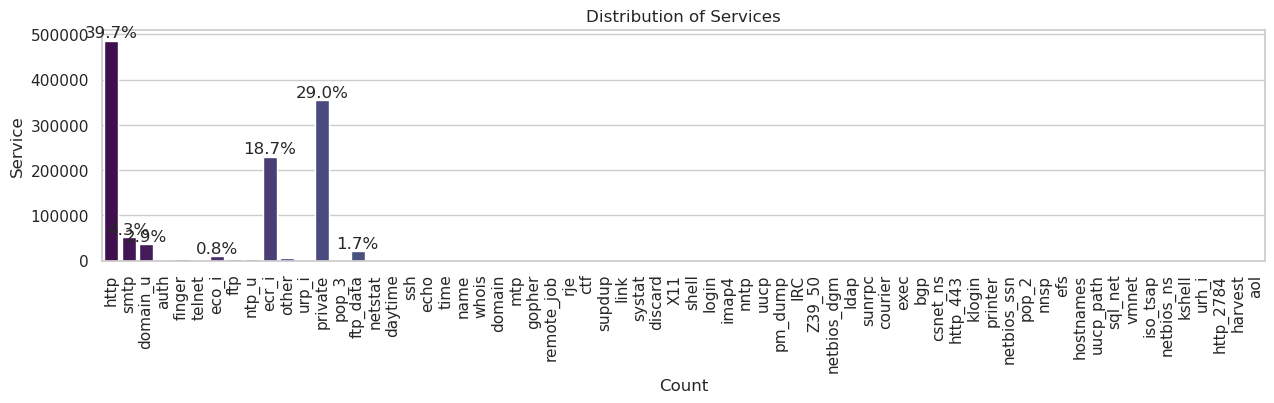

In [18]:
plt.figure(figsize=(15, 3))
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="service", palette="viridis")

plt.xlabel("Count")
plt.ylabel("Service")
plt.title("Distribution of Services")
plt.xticks(rotation=90)

# Add value counts on top of each bar
total = len(df["service"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if float(percentage[:-1]) > 0.5: ax.annotate(percentage, (x, y), ha='center', va='bottom')

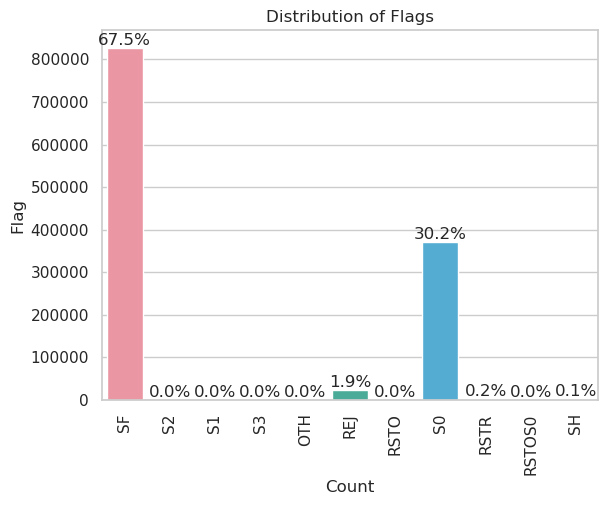

In [19]:
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="flag")

plt.xlabel("Count")
plt.ylabel("Flag")
plt.title("Distribution of Flags")
plt.xticks(rotation=90)

# Add value counts on top of each bar
total = len(df["logged_in"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

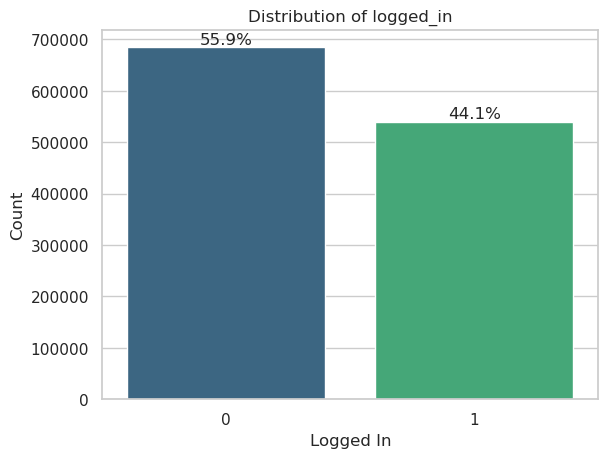

In [20]:
sns.set(style="whitegrid")

# Create the countplot
ax = sns.countplot(data=df, x="logged_in", palette="viridis")  # Using a different color palette

# Set plot labels and title
plt.xlabel("Logged In")
plt.ylabel("Count")
plt.title("Distribution of logged_in")

# Add value counts on top of each bar
total = len(df["logged_in"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

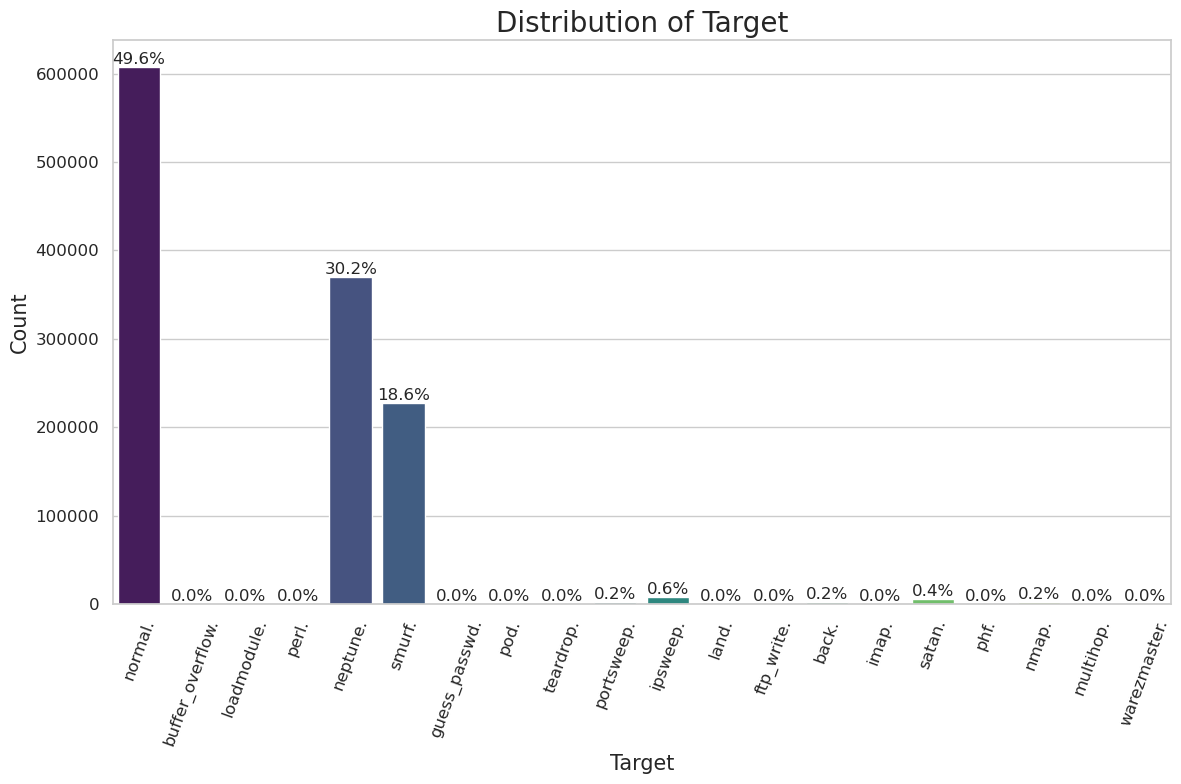

In [21]:
sns.set(style="whitegrid", palette="muted")

# Create the countplot with a color palette
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="target", palette="viridis")

# Set plot labels and title with increased font size
plt.xlabel('Target', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Target', fontsize=20)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=70, fontsize=12)
plt.yticks(fontsize=12)

# Add value counts on top of each bar
total = len(df["target"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()

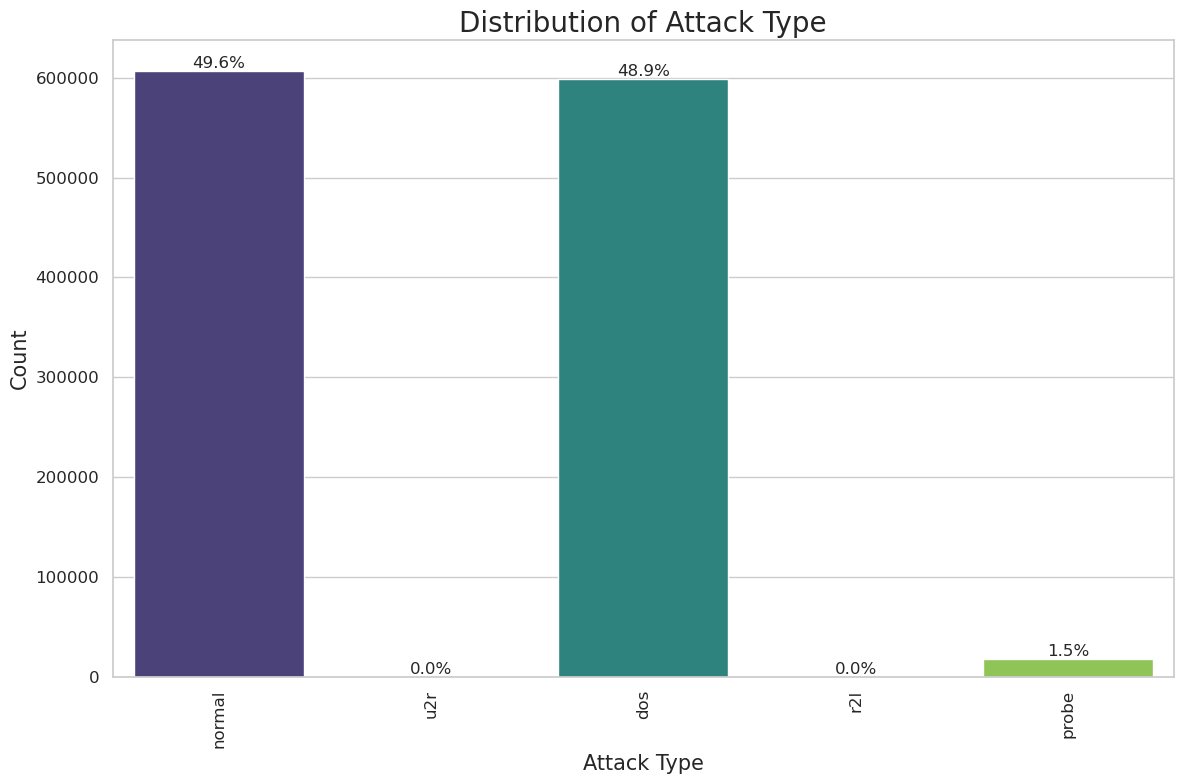

In [22]:
sns.set(style="whitegrid", palette="muted")

# Create the countplot with a color palette
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x="Attack Type", palette="viridis")

# Set plot labels and title with increased font size
plt.xlabel('Attack Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Attack Type', fontsize=20)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Add value counts on top of each bar
total = len(df["Attack Type"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()

In [23]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

# DATA CORRELATION

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['protocol_type', 'service', 'flag', 'target', 'Attack Type'], dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder

le_protocol = LabelEncoder()
col = 'protocol_type'
df[col + '_encoded'] = le_protocol.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded
0,0,tcp,http,SF,162,4528,0,0,0,0,...,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal,1
1,0,tcp,http,SF,236,1228,0,0,0,0,...,0.00,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal,1
2,0,tcp,http,SF,233,2032,0,0,0,0,...,0.00,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal,1
3,0,tcp,http,SF,239,486,0,0,0,0,...,0.00,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal,1
4,0,tcp,http,SF,238,1282,0,0,0,0,...,0.00,0.20,0.0,0.0,0.0,0.0,0.0,normal.,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1
1224603,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1
1224604,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1
1224605,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1


In [27]:
from sklearn.preprocessing import LabelEncoder

le_service = LabelEncoder()
col = 'service'
df[col + '_encoded'] = le_service.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded,service_encoded
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24
1,0,tcp,http,SF,236,1228,0,0,0,0,...,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24
2,0,tcp,http,SF,233,2032,0,0,0,0,...,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24
3,0,tcp,http,SF,239,486,0,0,0,0,...,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24
4,0,tcp,http,SF,238,1282,0,0,0,0,...,0.20,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1,48
1224603,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1,48
1224604,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1,48
1224605,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1,48


In [28]:
from sklearn.preprocessing import LabelEncoder

le_flag = LabelEncoder()
col = 'flag'
df[col + '_encoded'] = le_flag.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded,service_encoded,flag_encoded
0,0,tcp,http,SF,162,4528,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24,9
1,0,tcp,http,SF,236,1228,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24,9
2,0,tcp,http,SF,233,2032,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24,9
3,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24,9
4,0,tcp,http,SF,238,1282,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,normal.,normal,1,24,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1,48,5
1224603,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1,48,5
1224604,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1,48,5
1224605,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,neptune.,dos,1,48,5


In [29]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
col = 'target'
df[col + '_encoded'] = le_target.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded,service_encoded,flag_encoded,target_encoded
0,0,tcp,http,SF,162,4528,0,0,0,0,...,0.0,0.0,0.0,0.0,normal.,normal,1,24,9,11
1,0,tcp,http,SF,236,1228,0,0,0,0,...,0.0,0.0,0.0,0.0,normal.,normal,1,24,9,11
2,0,tcp,http,SF,233,2032,0,0,0,0,...,0.0,0.0,0.0,0.0,normal.,normal,1,24,9,11
3,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.0,0.0,0.0,normal.,normal,1,24,9,11
4,0,tcp,http,SF,238,1282,0,0,0,0,...,0.0,0.0,0.0,0.0,normal.,normal,1,24,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,neptune.,dos,1,48,5,9
1224603,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,neptune.,dos,1,48,5,9
1224604,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,neptune.,dos,1,48,5,9
1224605,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,neptune.,dos,1,48,5,9


In [30]:
from sklearn.preprocessing import LabelEncoder

le_Attack_type = LabelEncoder()
col = 'Attack Type'
df[col + '_encoded'] = le_Attack_type.fit_transform(df[col])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,protocol_type_encoded,service_encoded,flag_encoded,target_encoded,Attack Type_encoded
0,0,tcp,http,SF,162,4528,0,0,0,0,...,0.0,0.0,0.0,normal.,normal,1,24,9,11,1
1,0,tcp,http,SF,236,1228,0,0,0,0,...,0.0,0.0,0.0,normal.,normal,1,24,9,11,1
2,0,tcp,http,SF,233,2032,0,0,0,0,...,0.0,0.0,0.0,normal.,normal,1,24,9,11,1
3,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.0,0.0,normal.,normal,1,24,9,11,1
4,0,tcp,http,SF,238,1282,0,0,0,0,...,0.0,0.0,0.0,normal.,normal,1,24,9,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,0.0,0.0,neptune.,dos,1,48,5,9,0
1224603,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,0.0,0.0,neptune.,dos,1,48,5,9,0
1224604,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,0.0,0.0,neptune.,dos,1,48,5,9,0
1224605,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,0.0,0.0,neptune.,dos,1,48,5,9,0


In [31]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df = df.drop(categorical_columns, axis=1)
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_encoded,service_encoded,flag_encoded,target_encoded,Attack Type_encoded
0,0,162,4528,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1,24,9,11,1
1,0,236,1228,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1,24,9,11,1
2,0,233,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1,24,9,11,1
3,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1,24,9,11,1
4,0,238,1282,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1,24,9,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1,48,5,9,0
1224603,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1,48,5,9,0
1224604,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1,48,5,9,0
1224605,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,1,48,5,9,0


<Axes: >

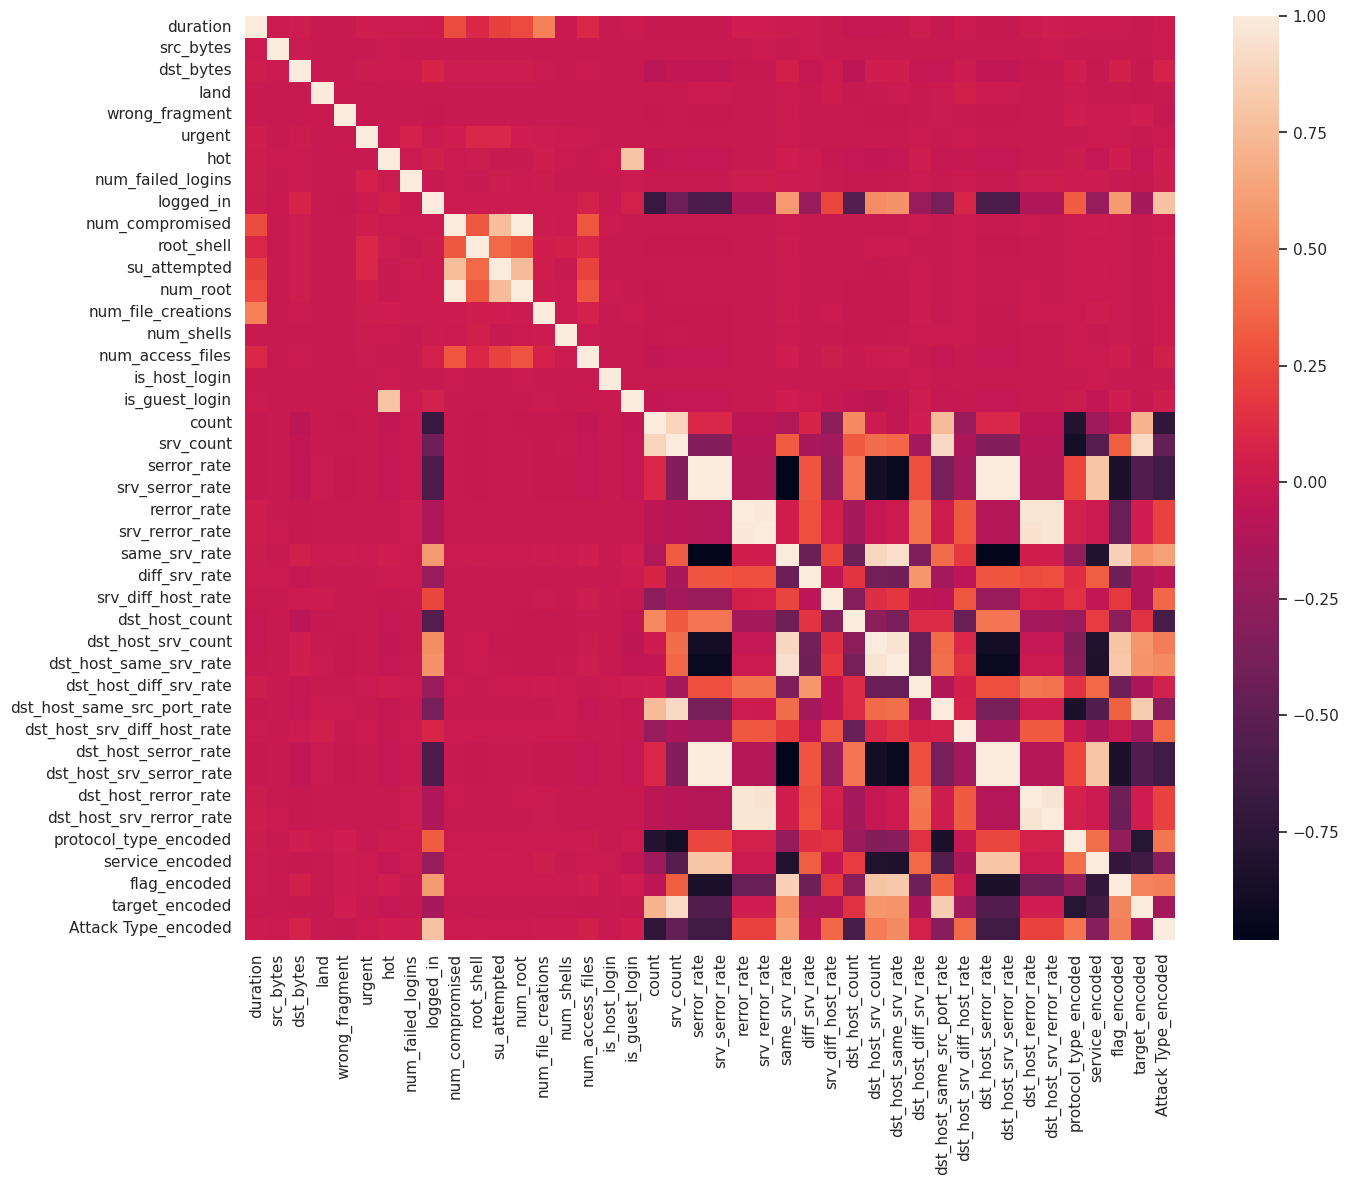

In [32]:
df = df.dropna(axis='columns')# drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

In [33]:
# correlation coefficient between 'num_root'  and the 'num_compromised' 
df['num_root'].corr(df['num_compromised'])

0.9934522824564033

In [34]:
# correlation coefficient between 'srv_serror_rate' and 'serror_rate' 
df['srv_serror_rate'].corr(df['serror_rate'])

0.9991163218820109

In [35]:
# Correlation values
correlation_dict = {}

for col1 in df.columns:
    for col2 in df.columns:
        if df.columns.get_loc(col1) < df.columns.get_loc(col2):
            correlation = df[col1].corr(df[col2])
            correlation_dict[f'{col1}---{col2}'] = correlation

# Descending order
sorted_correlation_dict = {k: v for k, v in sorted(correlation_dict.items(), key=lambda item: item[1], reverse=True)}
sorted_correlation_dict

{'srv_serror_rate---dst_host_srv_serror_rate': 0.9992868130540979,
 'serror_rate---srv_serror_rate': 0.9991163218820109,
 'serror_rate---dst_host_serror_rate': 0.9989579645763772,
 'dst_host_serror_rate---dst_host_srv_serror_rate': 0.9987405676590839,
 'serror_rate---dst_host_srv_serror_rate': 0.9987030422302099,
 'srv_serror_rate---dst_host_serror_rate': 0.9982542348044569,
 'num_compromised---num_root': 0.9934522824564033,
 'rerror_rate---srv_rerror_rate': 0.9826138112951642,
 'rerror_rate---dst_host_srv_rerror_rate': 0.965546678866925,
 'rerror_rate---dst_host_rerror_rate': 0.9645685577114467,
 'srv_rerror_rate---dst_host_srv_rerror_rate': 0.9638261116672969,
 'dst_host_srv_count---dst_host_same_srv_rate': 0.9611975034883267,
 'dst_host_rerror_rate---dst_host_srv_rerror_rate': 0.9605521624431591,
 'srv_rerror_rate---dst_host_rerror_rate': 0.9492512392334419,
 'same_srv_rate---dst_host_same_srv_rate': 0.9377452517370206,
 'srv_count---target_encoded': 0.9137483803118126,
 'srv_count-

In [36]:
#These variables are highly correlated and should be ignored for analysis.
#(Correlation = 0.9938277978738366 with num_compromised)
df.drop('num_root',axis = 1,inplace = True)

#(Correlation = 0.9983615072725952 with serror_rate)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#(Correlation = 0.9947309539817937 with rerror_rate)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#(Correlation = 0.9993041091850098 with srv_serror_rate)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#(Correlation = 0.9869947924956001 with rerror_rate)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#(Correlation = 0.9821663427308375 with srv_rerror_rate)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#(Correlation = 0.9851995540751249 with rerror_rate)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#(Correlation = 0.9736854572953938 with dst_host_srv_count)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [37]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type_encoded,service_encoded,flag_encoded,target_encoded,Attack Type_encoded
0,0,162,4528,0,0,0,0,0,1,0,...,1,1,0.00,1.00,0.0,1,24,9,11,1
1,0,236,1228,0,0,0,0,0,1,0,...,2,2,0.00,0.50,0.0,1,24,9,11,1
2,0,233,2032,0,0,0,0,0,1,0,...,3,3,0.00,0.33,0.0,1,24,9,11,1
3,0,239,486,0,0,0,0,0,1,0,...,4,4,0.00,0.25,0.0,1,24,9,11,1
4,0,238,1282,0,0,0,0,0,1,0,...,5,5,0.00,0.20,0.0,1,24,9,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,0,0,0,0,0,0,0,0,0,...,255,12,0.06,0.00,0.0,1,48,5,9,0
1224603,0,0,0,0,0,0,0,0,0,0,...,255,13,0.06,0.00,0.0,1,48,5,9,0
1224604,0,0,0,0,0,0,0,0,0,0,...,255,14,0.06,0.00,0.0,1,48,5,9,0
1224605,0,0,0,0,0,0,0,0,0,0,...,255,15,0.06,0.00,0.0,1,48,5,9,0


In [38]:
df.shape

(1224607, 34)

In [39]:
# écart type
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

is_host_login                       0.000904
land                                0.003726
urgent                              0.006516
su_attempted                        0.011250
num_shells                          0.012022
num_failed_logins                   0.012683
root_shell                          0.014287
wrong_fragment                      0.038495
is_guest_login                      0.042491
num_access_files                    0.053009
dst_host_srv_diff_host_rate         0.054270
diff_srv_rate                       0.086777
dst_host_diff_srv_rate              0.093749
rerror_rate                         0.142374
num_file_creations                  0.177504
srv_diff_host_rate                  0.210627
dst_host_same_src_port_rate         0.402101
same_srv_rate                       0.432798
protocol_type_encoded               0.448957
serror_rate                         0.459094
logged_in                           0.496484
Attack Type_encoded                 0.528623
hot       

# Feature Mapping

In [41]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'protocol_type_encoded', 'service_encoded', 'flag_encoded',
       'target_encoded', 'Attack Type_encoded'],
      dtype='object')

In [42]:
print(df['protocol_type_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_protocol.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

protocol_type_encoded
1    945029
0    239912
2     39666
Name: count, dtype: int64


Integer code: 0, Corresponding class: icmp
Integer code: 1, Corresponding class: tcp
Integer code: 2, Corresponding class: udp


In [43]:
print(df['service_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_service.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

service_encoded
24    486084
48    354967
15    229490
52     52087
12     36106
       ...  
1         31
44         2
25         1
22         1
3          1
Name: count, Length: 66, dtype: int64


Integer code: 0, Corresponding class: IRC
Integer code: 1, Corresponding class: X11
Integer code: 2, Corresponding class: Z39_50
Integer code: 3, Corresponding class: aol
Integer code: 4, Corresponding class: auth
Integer code: 5, Corresponding class: bgp
Integer code: 6, Corresponding class: courier
Integer code: 7, Corresponding class: csnet_ns
Integer code: 8, Corresponding class: ctf
Integer code: 9, Corresponding class: daytime
Integer code: 10, Corresponding class: discard
Integer code: 11, Corresponding class: domain
Integer code: 12, Corresponding class: domain_u
Integer code: 13, Corresponding class: echo
Integer code: 14, Corresponding class: eco_i
Integer code: 15, Corresponding class: ecr_i
Integer code: 16, Corresponding class: efs
Integer code: 17, Corresponding class: exec
In

In [44]:
print(df['flag_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_flag.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

flag_encoded
9     827040
5     370117
1      22722
4       2608
10      1038
2        523
6        323
3        112
7         93
8         17
0         14
Name: count, dtype: int64


Integer code: 0, Corresponding class: OTH
Integer code: 1, Corresponding class: REJ
Integer code: 2, Corresponding class: RSTO
Integer code: 3, Corresponding class: RSTOS0
Integer code: 4, Corresponding class: RSTR
Integer code: 5, Corresponding class: S0
Integer code: 6, Corresponding class: S1
Integer code: 7, Corresponding class: S2
Integer code: 8, Corresponding class: S3
Integer code: 9, Corresponding class: SF
Integer code: 10, Corresponding class: SH


In [45]:
print(df['target_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_target.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

target_encoded
11    607224
9     369420
17    227524
5       7579
16      5393
15      2782
10      2316
0       2002
18       199
3         53
14        40
19        20
6         17
4         12
2          8
8          6
1          5
13         3
12         2
7          2
Name: count, dtype: int64


Integer code: 0, Corresponding class: back.
Integer code: 1, Corresponding class: buffer_overflow.
Integer code: 2, Corresponding class: ftp_write.
Integer code: 3, Corresponding class: guess_passwd.
Integer code: 4, Corresponding class: imap.
Integer code: 5, Corresponding class: ipsweep.
Integer code: 6, Corresponding class: land.
Integer code: 7, Corresponding class: loadmodule.
Integer code: 8, Corresponding class: multihop.
Integer code: 9, Corresponding class: neptune.
Integer code: 10, Corresponding class: nmap.
Integer code: 11, Corresponding class: normal.
Integer code: 12, Corresponding class: perl.
Integer code: 13, Corresponding class: phf.
Integer code: 14, Corresponding clas

In [46]:
print(df['Attack Type_encoded'].value_counts())
print("\n")
for code, label in enumerate(le_Attack_type.classes_):
    print(f"Integer code: {code}, Corresponding class: {label}")

Attack Type_encoded
1    607224
0    599202
2     18070
3       102
4         9
Name: count, dtype: int64


Integer code: 0, Corresponding class: dos
Integer code: 1, Corresponding class: normal
Integer code: 2, Corresponding class: probe
Integer code: 3, Corresponding class: r2l
Integer code: 4, Corresponding class: u2r


# Models

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [49]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type_encoded,service_encoded,flag_encoded,target_encoded,Attack Type_encoded
0,0,162,4528,0,0,0,0,0,1,0,...,1,1,0.00,1.00,0.0,1,24,9,11,1
1,0,236,1228,0,0,0,0,0,1,0,...,2,2,0.00,0.50,0.0,1,24,9,11,1
2,0,233,2032,0,0,0,0,0,1,0,...,3,3,0.00,0.33,0.0,1,24,9,11,1
3,0,239,486,0,0,0,0,0,1,0,...,4,4,0.00,0.25,0.0,1,24,9,11,1
4,0,238,1282,0,0,0,0,0,1,0,...,5,5,0.00,0.20,0.0,1,24,9,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224602,0,0,0,0,0,0,0,0,0,0,...,255,12,0.06,0.00,0.0,1,48,5,9,0
1224603,0,0,0,0,0,0,0,0,0,0,...,255,13,0.06,0.00,0.0,1,48,5,9,0
1224604,0,0,0,0,0,0,0,0,0,0,...,255,14,0.06,0.00,0.0,1,48,5,9,0
1224605,0,0,0,0,0,0,0,0,0,0,...,255,15,0.06,0.00,0.0,1,48,5,9,0


In [50]:
df = df.drop(['target_encoded',], axis=1)
df.shape

(1224607, 33)

In [51]:
# Target variable and train set
y = df[['Attack Type_encoded']]
X = df.drop(['Attack Type_encoded',], axis=1)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(918455, 32) (306152, 32)
(918455, 1) (306152, 1)


#### GAUSSIAN NAIVE BAYES

In [53]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()

model_GNB.fit(X_train, y_train.values.ravel())

y_test_pred__GNB = model_GNB.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred__GNB))

cm1 = confusion_matrix(y_test, y_test_pred__GNB)
cm1

              precision    recall  f1-score   support

           0       0.80      1.00      0.89    149700
           1       0.99      0.69      0.82    151929
           2       0.18      0.51      0.27      4490
           3       0.01      0.20      0.01        30
           4       0.01      0.67      0.03         3

    accuracy                           0.84    306152
   macro avg       0.40      0.61      0.40    306152
weighted avg       0.89      0.84      0.84    306152



array([[149042,    503,    155,      0,      0],
       [ 35608, 105383,   9966,    830,    142],
       [  2169,     31,   2273,     17,      0],
       [     0,      4,     19,      6,      1],
       [     0,      0,      0,      1,      2]])

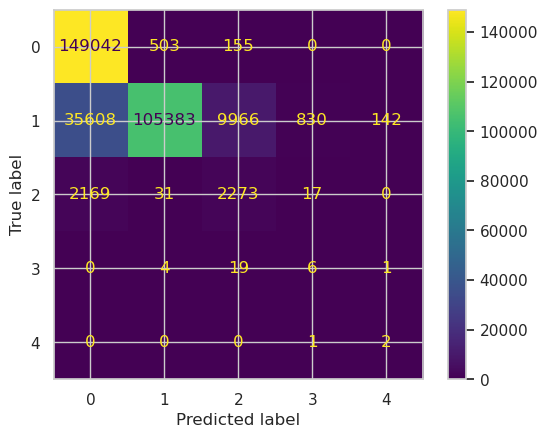

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()

[ 73476 108281 143085 177890 212694 247499 282304 317108 351913 386717
 421522 456327 491131 525936 560740 595545 630350 665154 699959 734764]


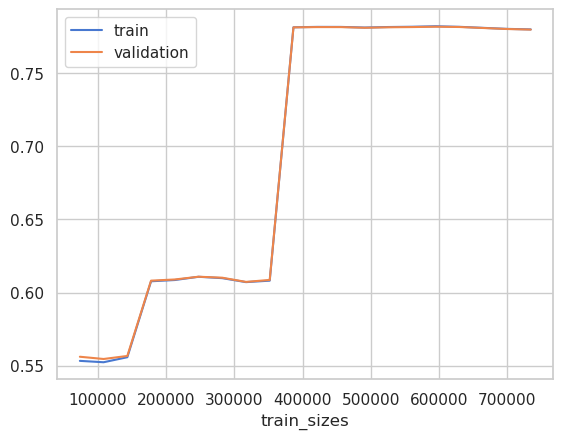

In [56]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_GNB, X_train, y_train.values.ravel(),
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### SGDClassifier

In [58]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1200000, random_state=42)

sgd_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_test_pred_SGD = sgd_classifier.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred_SGD))

cm4 = confusion_matrix(y_test, y_test_pred_SGD)
cm4

/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98    149700
           1       0.98      0.98      0.98    151929
           2       0.53      0.06      0.10      4490
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00         3

    accuracy                           0.98    306152
   macro avg       0.50      0.41      0.41    306152
weighted avg       0.97      0.98      0.97    306152



/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[148887,    751,     62,      0,      0],
       [  2357, 149408,    163,      0,      1],
       [  1515,   2718,    256,      0,      1],
       [     5,     23,      2,      0,      0],
       [     0,      3,      0,      0,      0]])

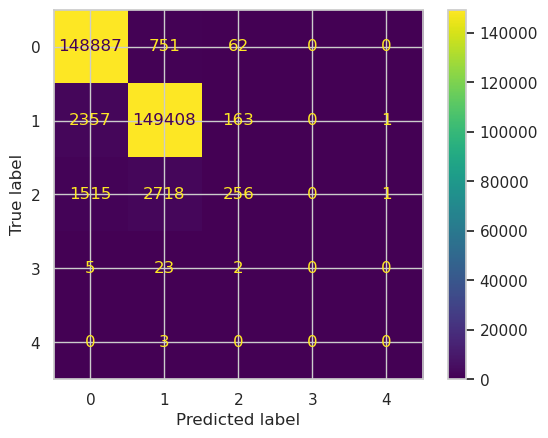

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()

[ 73476 108281 143085 177890 212694 247499 282304 317108 351913 386717
 421522 456327 491131 525936 560740 595545 630350 665154 699959 734764]


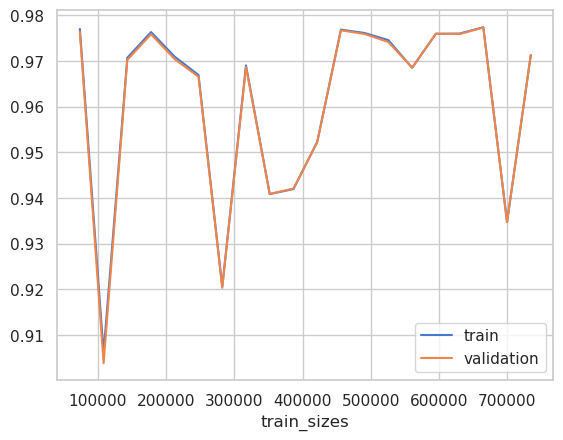

In [61]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(sgd_classifier, X_train, y_train.values.ravel(),
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### LOGISTIC REGRESSION

In [63]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=1200000, multi_class='ovr')

model_LR.fit(X_train, y_train.values.ravel())

y_test_pred_LR = model_LR.predict(X_test)

/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred_LR))

cm2 = confusion_matrix(y_test, y_test_pred_LR)
cm2

/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149700
           1       0.98      1.00      0.99    151929
           2       0.98      0.57      0.72      4490
           3       1.00      0.07      0.12        30
           4       0.00      0.00      0.00         3

    accuracy                           0.99    306152
   macro avg       0.79      0.53      0.57    306152
weighted avg       0.99      0.99      0.99    306152



array([[148962,    735,      3,      0,      0],
       [   394, 151490,     45,      0,      0],
       [   212,   1714,   2564,      0,      0],
       [     0,     28,      0,      2,      0],
       [     0,      3,      0,      0,      0]])

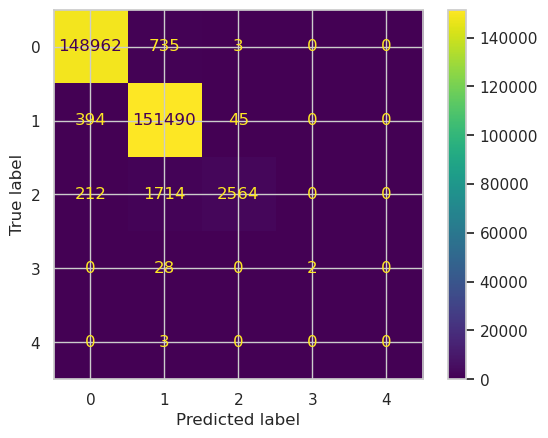

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()

#### DECISION TREE

In [67]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

model_DT.fit(X_train, y_train.values.ravel())

y_test_pred_DT = model_DT.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred_DT))

cm3 = confusion_matrix(y_test, y_test_pred_DT)
cm3

/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149700
           1       1.00      1.00      1.00    151929
           2       0.99      0.97      0.98      4490
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00         3

    accuracy                           1.00    306152
   macro avg       0.60      0.59      0.59    306152
weighted avg       1.00      1.00      1.00    306152



/home/saif/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[149157,    537,      6,      0,      0],
       [     2, 151879,     48,      0,      0],
       [     0,    127,   4363,      0,      0],
       [     0,     21,      9,      0,      0],
       [     0,      3,      0,      0,      0]])

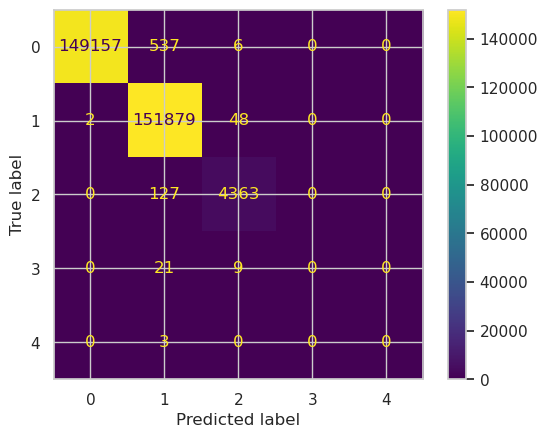

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()

[ 73476 108281 143085 177890 212694 247499 282304 317108 351913 386717
 421522 456327 491131 525936 560740 595545 630350 665154 699959 734764]


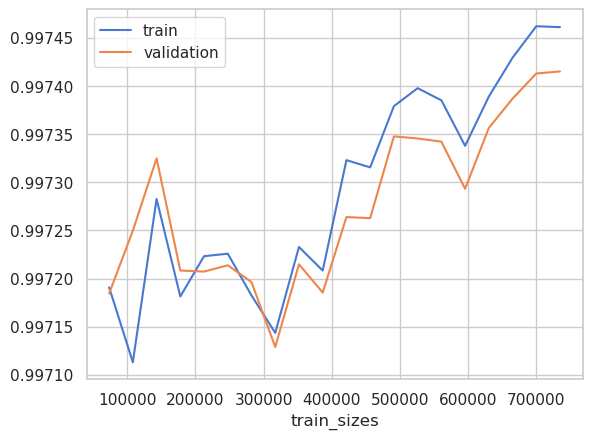

In [70]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_DT, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()